# Texas A&M Performance Analysis (Home vs. Away)
This project analyzes Texas A&M's performance in college football games after the Kyle Field Renovations in 2015. We compare their performance at home vs. away games, including metrics like win percentage, yards gained, and time of possession. We will also compare these metrics to the SEC averages to see how Kyle Field compares to the rest of the SEC


In [2]:
#Library imports:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Data Preparation
Here, we clean and preprocess the data. I have used the cfbdata set that has college football data from 2005-2024. I then go on to create three new data frames, one for A&M games at home, one for A&M Away, and then the rest of the SEC.

I have preserved the original dataframe for possible more analysis later and saved in *clean_and_rename_data* function.


In [4]:
def clean_and_rename_data(file_path):
    # Load the data
    AllStats = pd.read_csv(file_path)
    
    # Set pandas option to show all columns
    pd.set_option('display.max_columns', None)
    
    # Renaming columns
    column_rename_dict = {
        'attendance': 'Attendance',
        'int_away': 'Interceptions Thrown - Away',
        'int_home': 'Interceptions Thrown - Home',
        'q1_away': 'Q1 - Away',
        'q2_away': 'Q2 - Away',
        'q3_away': 'Q3 - Away',
        'q4_away': 'Q4 - Away',
        'ot_away': 'OT - Away',
        'q1_home': 'Q1 - Home',
        'q2_home': 'Q2 - Home',
        'q3_home': 'Q3 - Home',
        'q4_home': 'Q4 - Home',
        'ot_home': 'OT - Home',
        'first_downs_away': 'First Downs - Away',
        'first_downs_home': 'First Downs - Home',
        'third_down_comp_away': 'Third Downs - Completed - Away',
        'third_down_att_away': 'Third Downs - Attempted - Away',
        'third_down_comp_home': 'Third Downs - Completed - Home',
        'third_down_att_home': 'Third Downs - Attempted - Home',
        'fourth_down_comp_away': 'Fourth Downs - Completed - Away',
        'fourth_down_att_away': 'Fourth Downs - Attempted - Away',
        'fourth_down_comp_home': 'Fourth Downs - Completed - Home',
        'fourth_down_att_home': 'Fourth Downs - Attempted - Home',
        'pass_comp_away': 'Pass Completions - Away',
        'pass_att_away': 'Pass Attempts - Away',
        'pass_yards_away': 'Passing Yards - Away',
        'pass_comp_home': 'Pass Completions - Home',
        'pass_att_home': 'Pass Attempts - Home',
        'pass_yards_home': 'Passing Yards - Home',
        'rush_att_away': 'Rush Attempts - Away',
        'rush_yards_away': 'Rushing Yards - Away',
        'rush_att_home': 'Rush Attempts - Home',
        'rush_yards_home': 'Rushing Yards - Home',
        'total_yards_away': 'Total Yards - Away',
        'total_yards_home': 'Total Yards - Home',
        'fum_away': 'Fumbles Lost - Away',
        'fum_home': 'Fumbles Lost - Home',
        'pen_num_away': 'Penalties - Count - Away',
        'pen_yards_away': 'Penalties - Yards - Away',
        'pen_num_home': 'Penalties - Count - Home',
        'pen_yards_home': 'Penalties - Yards - Home',
        'rank_home': 'Rank - Home',
        'rank_away': 'Rank - Away',
        'game_type': 'Game Type',
        'conf_away': 'Conference - Away',
        'conf_home': 'Conference - Home',
        'tv': 'TV Coverage',
        'date': 'Game Date',
        'time_et': 'Game Time (ET)',
        'time_cst': 'Game Time (CST)',
        'score_home': 'Score - Home',
        'score_away': 'Score - Away',
        'possession_home': 'Time of Possession - Home',
        'possession_away': 'Time of Possession - Away',
        'neutral': 'Neutral Site'
    }
    
    AllStats.rename(columns=column_rename_dict, inplace=True)

    # Convert Data Types
    columns_to_convert = ['season', 'Attendance', 'Interceptions Thrown - Away', 'Interceptions Thrown - Home', 'Q1 - Away', 'Q2 - Away', 
                          'Q3 - Away', 'Q4 - Away', 'OT - Away', 'Q1 - Home', 'Q2 - Home', 'Q3 - Home', 'Q4 - Home', 'OT - Home', 
                          'First Downs - Away', 'First Downs - Home', 'Third Downs - Completed - Away', 'Third Downs - Attempted - Away', 
                          'Third Downs - Completed - Home', 'Third Downs - Attempted - Home', 'Fourth Downs - Completed - Away', 
                          'Fourth Downs - Attempted - Away', 'Fourth Downs - Completed - Home', 'Fourth Downs - Attempted - Home', 
                          'Pass Completions - Away', 'Pass Attempts - Away', 'Passing Yards - Away', 'Pass Completions - Home', 
                          'Pass Attempts - Home', 'Passing Yards - Home', 'Rush Attempts - Away', 'Rushing Yards - Away', 
                          'Rush Attempts - Home', 'Rushing Yards - Home', 'Total Yards - Away', 'Total Yards - Home', 
                          'Fumbles Lost - Away', 'Fumbles Lost - Home', 'Penalties - Count - Away', 'Penalties - Yards - Away', 
                          'Penalties - Count - Home', 'Penalties - Yards - Home']
    AllStats[columns_to_convert] = AllStats[columns_to_convert].fillna(0).astype(int)
    AllStats = AllStats[AllStats['Neutral Site'] == False].copy()
    # Nullable Integers
    nullable_ints = ['Rank - Home', 'Rank - Away']
    AllStats[nullable_ints] = AllStats[nullable_ints].astype('Int64')

    # Convert to categorical
    cat_cols = ['Game Type', 'Conference - Away', 'Conference - Home', 'TV Coverage']
    AllStats[cat_cols] = AllStats[cat_cols].astype('category')

    # Convert time columns
    AllStats['Game Date'] = pd.to_datetime(AllStats['Game Date'], format='%Y-%m-%d')
    AllStats['Game Time (ET)'] = pd.to_datetime(AllStats['Game Time (ET)'], format='%I:%M %p')

    # Convert from ET to CST
    AllStats['Game Time (CST)'] = AllStats['Game Time (ET)'].dt.tz_localize("US/Eastern").dt.tz_convert("US/Central")

    # Convert back to 12-hour format for CST
    AllStats['Game Time (CST)'] = AllStats['Game Time (CST)'].dt.strftime('%I:%M %p')
    
    AllStats['Conference Game'] = AllStats.apply(conf_game,axis=1)
            
    AllStats['Win']=AllStats.apply(home_or_away,axis=1)
    
    AllStats['Point Difference'] = AllStats.apply(point_diff,axis=1)
    AllStats['victory_margin'] = AllStats.apply(victory_margin,axis=1)
    
    AllStats['Total Turnovers - Home'] = AllStats['Interceptions Thrown - Home'] + AllStats['Fumbles Lost - Home']
    AllStats['Total Turnovers - Away'] = AllStats['Interceptions Thrown - Away'] + AllStats['Fumbles Lost - Away']
    AllStats['Home Win'] = (AllStats['Win'] == AllStats['home']).astype(int)
    AllStats['Away Win'] = (AllStats['Win'] == AllStats['away']).astype(int)
                            
    return AllStats
def conf_game(row):
    home_conf = row['Conference - Home']
    away_conf = row['Conference - Away']
    game_type = row['Game Type']
    if (home_conf == away_conf):
        return "Conference Game"
    else:
        return "Out of Conference"

#new Columns for some extra data
#win or loss
def home_or_away(row):
    home_score = row['Score - Home']
    away_score = row['Score - Away']
    home_team = row['home']
    away_team = row['away']
    if home_score > away_score:
        return home_team
    elif home_score < away_score:
        return away_team
    else:
        return "tie"

#point difference
def point_diff(row):
    home_score = row['Score - Home']
    away_score = row['Score - Away']
    difference = abs(home_score - away_score)
    return difference

#win margin category for
def victory_margin(row):
    home_score = row['Score - Home']
    away_score = row['Score - Away']
    overtime_homescore = row['OT - Home']
    overtime_awayscore = row['OT - Away']
    difference = abs(home_score - away_score)
    if overtime_homescore !=0 or overtime_awayscore !=0:
        return "Overtime Game"
    elif difference > 21:
        return "Blowout"
    else:
        return "Close Game"

#home team win percentage 
def win_percent(row):
    home_wins = AllStats[AllStats['Win'] == AllStats['home']]
    home_game_totalcount = AllStats.groupby('home').size()
    home_wins_count = home_wins.groupby('home').size()
    win_percentage = (home_wins_count / home_game_totalcount) * 100
    return win_percentage


In [5]:
# Load and clean data
AllStats = clean_and_rename_data("cfb_box-scores_2002-2024.csv")

In [6]:
AllStats.head()

season  week  Game Date      Game Time (ET) Game Type            away  \
0    2002   1.0 2002-08-22 1900-01-01 19:30:00   regular  Colorado State   
1    2002   1.0 2002-08-23 1900-01-01 20:00:00   regular    Fresno State   
2    2002   1.0 2002-08-24 1900-01-01 14:30:00   regular      Texas Tech   
3    2002   1.0 2002-08-24 1900-01-01 16:30:00   regular      New Mexico   
4    2002   1.0 2002-08-24 1900-01-01 19:45:00   regular   Arizona State   

         home  Rank - Away  Rank - Home Conference - Away Conference - Home  \
0    Virginia         <NA>         <NA>               mwc               acc   
1   Wisconsin         <NA>           25               wac             big10   
2  Ohio State         <NA>           13             big12             big10   
3    NC State         <NA>         <NA>               mwc               acc   
4    Nebraska         <NA>           10             pac12             big12   

   Neutral Site  Score - Away  Score - Home  Q1 - Away  Q2 - Away  Q3 - Away  \
0         False            35            29          6         13          3   
1         False            21            23          7          0          7   
2         False            21            45          7          0          0   
3         False            14            34          0          0          7   
4         False            10            48          3          0          7   

   Q4 - Away  OT - Away  Q1 - Home  Q2 - Home  Q3 - Home  Q4 - Home  \
0         13          0          0          7         14          8   
1          7          0          0         10          7          6   
2         14          0         14          7         17          7   
3          7          0          7         14          6          7   
4          0          0          3          7         14         24   

   OT - Home  First Downs - Away  First Downs - Home  \
0          0                   0                   0   
1          0                   0                   0   
2          0                   0                   0   
3          0                   0                   0   
4          0                   0                   0   

   Third Downs - Completed - Away  Third Downs - Attempted - Away  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Third Downs - Completed - Home  Third Downs - Attempted - Home  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Fourth Downs - Completed - Away  Fourth Downs - Attempted - Away  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Fourth Downs - Completed - Home  Fourth Downs - Attempted - Home  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Pass Completions - Away  Pass Attempts - Away  Passing Yards - Away  \
0                        0                     0                    

In [7]:
# Filter Texas A&M home games after 2015, excluding 2020, with only conference games
TexasAM_Home = AllStats[(AllStats['home'] == 'Texas A&M') &
                        (AllStats['season'] > 2015) &
                        (AllStats['season'] != 2020) &
                        (AllStats['Conference Game'] == "Conference Game")]

# Filter Texas A&M away games after 2015, excluding 2020, with only conference games
TexasAM_Away = AllStats[(AllStats['away'] == 'Texas A&M') &
                        (AllStats['season'] > 2015) &
                        (AllStats['season'] != 2020) &
                        (AllStats['Conference Game'] == "Conference Game")]

# Filter SEC teams home games after 2015, excluding 2020, without Vanderbilt, and only conference games
SEC_Teams = AllStats[(AllStats['Conference - Home'] == 'sec') &
                     (AllStats['season'] > 2015) &
                     (AllStats['home'] != 'Texas A&M') &
                     (AllStats['season'] != 2020) &
                     (AllStats['home'] != 'Vanderbilt') &
                     (AllStats['Conference Game'] == "Conference Game")]

SEC_Teams = SEC_Teams[SEC_Teams['Attendance'] > 0]

In [8]:
# Home vs away win percentage:
sec_home_wins = SEC_Teams.apply(lambda row: 1 if row['Win'] == row['home'] else 0, axis=1).mean()*100
sec_away_wins = SEC_Teams.apply(lambda row: 1 if row['Win'] == row['away'] else 0, axis=1).mean()*100

# Home vs away total yards per game:
sec_home_yardsPG = SEC_Teams['Total Yards - Home'].mean()
sec_away_yardsPG = SEC_Teams['Total Yards - Away'].mean()

# Home vs away rushing yards:
sec_home_RyardsPG = SEC_Teams['Rushing Yards - Home'].mean()
sec_away_RyardsPG = SEC_Teams['Rushing Yards - Away'].mean()

# Home vs away passing yards:
sec_home_PyardsPG = SEC_Teams['Passing Yards - Home'].mean()
sec_away_PyardsPG = SEC_Teams['Passing Yards - Away'].mean()

# Total penalties per game for Texas A&M, home vs away:
sec_home_penalties = SEC_Teams['Penalties - Yards - Home'].mean()
sec_away_penalties = SEC_Teams['Penalties - Yards - Away'].mean()

# Total penalties per game for opposing teams, home vs away:
sec_home_Opp_penalties = SEC_Teams['Penalties - Yards - Away'].mean()
sec_away_Opp_penalties = SEC_Teams['Penalties - Yards - Home'].mean()

# Average ranking played away vs home:
sec_home_game_rankings = SEC_Teams['Rank - Away'].dropna().apply(lambda x: x if x >= 1 else 0).mean()
sec_away_game_rankings = SEC_Teams['Rank - Home'].dropna().apply(lambda x: x if x >= 1 else 0).mean()

# Average Unranked Teams played home vs away:
sec_home_unranked = SEC_Teams['Rank - Away'].isna().mean()*100
sec_away_unranked = SEC_Teams['Rank - Home'].isna().mean()*100

# Total time of possession for SEC:
sec_home_top = SEC_Teams['Time of Possession - Home'].mean()
sec_away_top = SEC_Teams['Time of Possession - Away'].mean()

# Total turnovers for SEC:
sec_home_to = SEC_Teams['Total Turnovers - Home'].mean()
sec_away_to = SEC_Teams['Total Turnovers - Away'].mean()

# Total attendance for SEC:
sec_att = SEC_Teams['Attendance'].mean()

# Home vs away wins for Texas A&M:
home_wins = TexasAM_Home.apply(lambda row: 1 if row['Win'] == 'Texas A&M' else 0, axis=1).mean()*100
away_wins = TexasAM_Away.apply(lambda row: 1 if row['Win'] == 'Texas A&M' else 0, axis=1).mean()*100

# Home vs away total yards per game for Texas A&M:
home_yardsPG = TexasAM_Home['Total Yards - Home'].mean()
away_yardsPG = TexasAM_Away['Total Yards - Away'].mean()

# Home vs away rushing yards for Texas A&M:
home_RyardsPG = TexasAM_Home['Rushing Yards - Home'].mean()
away_RyardsPG = TexasAM_Away['Rushing Yards - Away'].mean()

# Home vs away passing yards for Texas A&M:
home_PyardsPG = TexasAM_Home['Passing Yards - Home'].mean()
away_PyardsPG = TexasAM_Away['Passing Yards - Away'].mean()

# Total penalties for Texas A&M, home vs away:
home_TAMUpenalties = TexasAM_Home['Penalties - Yards - Home'].mean()
away_TAMUpenalties = TexasAM_Away['Penalties - Yards - Away'].mean()

# Total penalties for opposing teams, home vs away for Texas A&M:
home_Opppenalties = TexasAM_Home['Penalties - Yards - Away'].mean()
away_Opppenalties = TexasAM_Away['Penalties - Yards - Home'].mean()

# Average ranking played away vs home for Texas A&M:
home_game_rankings = TexasAM_Home['Rank - Away'].dropna().apply(lambda x: x if x >= 1 else 0).mean()
away_game_rankings = TexasAM_Away['Rank - Home'].dropna().apply(lambda x: x if x >= 1 else 0).mean()

# Percentage of games against Unranked Teams played home vs away for Texas A&M:
home_unranked = TexasAM_Home['Rank - Away'].isna().mean()*100
away_unranked = TexasAM_Home['Rank - Home'].isna().mean()*100

# Total time of possession for Texas A&M:
home_top = TexasAM_Home['Time of Possession - Home'].mean()
away_top = TexasAM_Home['Time of Possession - Away'].mean()

# Total turnovers for Texas A&M:
home_to = TexasAM_Home['Total Turnovers - Home'].mean()
away_to = TexasAM_Away['Total Turnovers - Away'].mean()

# Total attendance for Texas A&M:
tamu_att = TexasAM_Home['Attendance'].mean()


## Graph 1. Bar Chart: Texas A&M Home vs. Away Win Percentage, Average Ranked Team Played, Percentage of Games Against Unranked Teams, and Time of Possession
#### Using Plotly, Saved as a static PNG to show in GitHub
* **Win Percentage:** Comparing Texas A&M's win percentage at home vs away.
* **Average Ranked Played:** When playing a ranked team, this shows the average rank of teams played at home vs. away.
* **Percentage of Games Against Unranked Teams:** Shows the percentage of games played against unranked teams for both home and away.
* **Time of Possession:** Compares the average time of possession at home and away.


In [10]:
# Graph 1: Dive deeper into wins (Home vs Away)
# Data for Home and Away stats
data2 = {
    'Metric': ['Total Win Percentage', 'Average Rankings Played', 'Percent of Games Against Unranked Teams', 'Time of Possession'],
    'Home': [home_wins, home_game_rankings, home_unranked, home_top],
    'Away': [away_wins, away_game_rankings, away_unranked, away_top]
}

# Create DataFrame and melt it for better plotting
df2 = pd.DataFrame(data2)
df2_melted = pd.melt(df2, id_vars=['Metric'], value_vars=['Away', 'Home'], 
                     var_name='Game Type', value_name='Value')

# Plotly
fig2 = px.bar(df2_melted, 
              x='Metric', 
              y='Value', 
              color='Game Type', 
              barmode='group', 
              color_discrete_sequence=['#000000', '#800000'],
              title='Type of Wins (Home vs Away)')
fig2.update_layout(
    title_font_size=30,
    xaxis_title=' ',
    yaxis_title='Value',
    legend_title='Game Type',
    height=600,
    width=1100
)

fig2.show()


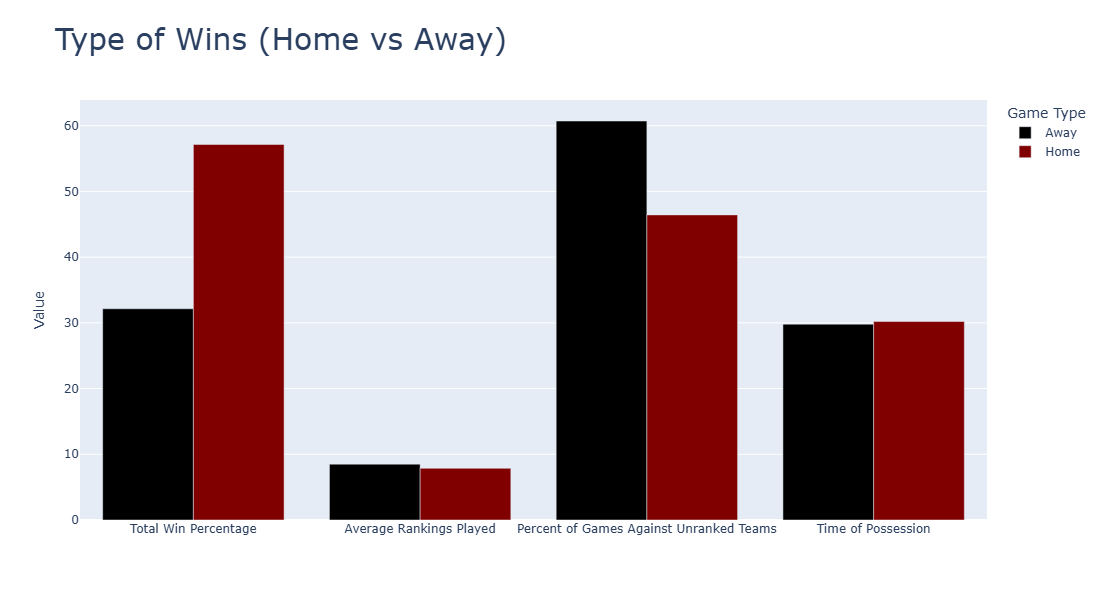

In [68]:
from IPython.display import Image
Image(filename='images/Wins2.png')


## Interpretation of Graph 1
This bar chart reflects Texas A&M's performance at home versus away. The much higher home win percentage suggests a potential home-field advantage. The chart also shows that A&M is significantly more likely to face a ranked team at home, with the average ranking of those teams just below 8. This indicates that their home schedule is actually quite challenging—harder than their away schedule, in fact. Despite this, their time of possession remains fairly consistent whether playing at home or away, implying that possession may not be a major factor in their home-field advantage.


## Graph 2. Box Chart: Yard Differences, Total Rushing, Passing, and Penalty Yards for Texas A&M Home vs. Away
#### Using Plotly, Saved as a static PNG to show in GitHub
* **Yard Differences:** Displays the differences in total yards gained at home vs. away.
* **Total Rushing Yards:** Compares total rushing yards gained by Texas A&M at home vs. away.
* **Passing Yards:** Compares total passing yards gained at home vs. away.
* **Penalty Yards:** Compares total penalty yards committed by Texas A&M at home vs. away.

In [14]:
#I decided to leave this in because I couldn't believe my eyes.
TexasAM_Away[TexasAM_Away['Rushing Yards - Away']<0]

season  week  Game Date      Game Time (ET) Game Type       away  \
14585    2019  13.0 2019-11-23 1900-01-01 15:30:00   regular  Texas A&M   

          home  Rank - Away  Rank - Home Conference - Away Conference - Home  \
14585  Georgia         <NA>            4               sec               sec   

       Neutral Site  Score - Away  Score - Home  Q1 - Away  Q2 - Away  \
14585         False            13            19          0          3   

       Q3 - Away  Q4 - Away  OT - Away  Q1 - Home  Q2 - Home  Q3 - Home  \
14585          3          7          0          3         10          3   

       Q4 - Home  OT - Home  First Downs - Away  First Downs - Home  \
14585          3          0                  16                  12   

       Third Downs - Completed - Away  Third Downs - Attempted - Away  \
14585                               4                              15   

       Third Downs - Completed - Home  Third Downs - Attempted - Home  \
14585                               5                              15   

       Fourth Downs - Completed - Away  Fourth Downs - Attempted - Away  \
14585                                0                                1   

       Fourth Downs - Completed - Home  Fourth Downs - Attempted - Home  \
14585                                0                                0   

       Pass Completions - Away  Pass Attempts - Away  Passing Yards - Away  \
14585                       25                    42                   275   

       Pass Completions - Home  Pass Attempts - Home  Passing Yards - Home  \
14585                       11                    23                   163   

       Rush Attempts - Away  Rushing Yards - Away  Rush Attempts - Home  \
14585                    20                    -2                    36   

       Rushing Yards - Home  Total Yards - Away  Total Yards - Home  \
14585                    97                 273                 260   

       Fumbles Lost - Away  Fumbles Lost - Home  Interceptions Thrown - Away  \
14585                    1                    0                            0   

       Interceptions Thrown - Home  Penalties - Count - Away  \
14585                            0                         7   

       Penalties - Yards - Away  Penalties - Count - Home  \
14585                        45                         2   

       Penalties - Yards - Home  Time of Possession - Away  \
14585                        30                      31.57   

       Time of Possession - Home  Attendance TV Coverage Game Time (CST)  \
14585                      28.43       92746         CBS        02:35 PM   

       Conference Game      Win  Point Difference victory_margin  \
14585  Conference Game  Georgia                 6     Close Game   

       Total Turnovers - Home  Total Turnovers - Away  Home Win  Away Win  
14585                       0                       1         1         0

In [15]:
#Graph 2: Boxplot showing difference in yards
home_data = TexasAM_Home[['Total Yards - Home', 'Rushing Yards - Home', 'Passing Yards - Home', 'Penalties - Yards - Home']].copy()
away_data = TexasAM_Away[['Total Yards - Away', 'Rushing Yards - Away', 'Passing Yards - Away', 'Penalties - Yards - Away']].copy()

# Rename columns so that both home and away share the same metric names
home_data.columns = ['Total Yards', 'Rushing Yards', 'Passing Yards', 'Penalty Yards']
away_data.columns = ['Total Yards', 'Rushing Yards', 'Passing Yards', 'Penalty Yards']

#Melt to change to long format
home_data_melted = home_data.melt(var_name='Metric', value_name='Value')
away_data_melted = away_data.melt(var_name='Metric', value_name='Value')

# Add a 'Game Type' column to distinguish home vs away
home_data_melted['Game Type'] = 'Home'
away_data_melted['Game Type'] = 'Away'

#Plotly
fig = px.box(
    pd.concat([home_data_melted, away_data_melted]),
    x='Metric',
    y='Value', 
    color='Game Type', 
    color_discrete_sequence=['#800000', '#000000'], 
    title='Yard Differences (Home vs Away)'
)
fig.update_layout(
    title_font_size=30,
    xaxis_title='',
    yaxis_title='Yards',
    legend_title='Location',
    height=600,
    width=1000
)
fig.show()



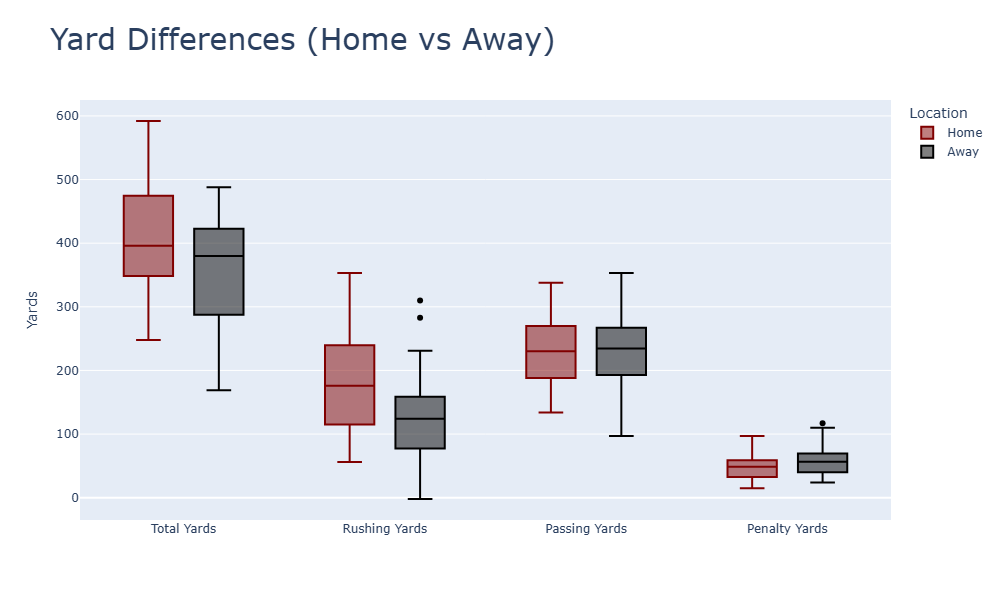

In [64]:
Image(filename='images/Yards2.png')

## Interpretation of Graph 2
This box chart compares key offensive metrics for Texas A&M at home versus away, showing the distribution of yards gained and allowed, along with the impact of penalties. The difference in total yardage indicates that A&M performs better offensively at home. While the median total yards are quite similar, the team’s performance at home shows a much wider range of outcomes, with a higher floor and ceiling. The key takeaway from this chart is that Texas A&M has a significantly stronger rushing game at home.

## Graph 3.  Stacked Bar Chart: Average Ranked Team Played and Percentage of Games Against Unranked Teams (Texas A&M vs SEC)
#### Using Plotly, Saved as a static PNG to show in GitHub
* **Average Ranked Team Played:** Displays the average rank of teams played by Texas A&M and the SEC at home and away.
* **Percentage of Games Against Unranked Teams:** Compares the percentage of games against unranked teams for Texas A&M and the SEC at home and away.

In [19]:
#Graph 3: SEC and TAMU Competition levels
data = {
    'Category': ['TAMU Home', 'TAMU Away', 'SEC Home', 'SEC Away'],
    'Average Ranked Team': [home_game_rankings, away_game_rankings, sec_home_game_rankings, sec_away_game_rankings],
    'Percent Against Unranked': [home_unranked, away_unranked, sec_home_unranked, sec_away_unranked]
}

# Convert to DataFrame and reshape for plotting
df = pd.DataFrame(data)
df_melted = df.melt(id_vars=['Category'], var_name='Metric', value_name='Value')

# Create the stacked bar chart
fig = px.bar(
    df_melted,
    x='Category',
    y='Value',
    color='Metric',
    title='Average Ranked Team and Percentage of Games Against Unranked Teams',
    color_discrete_map={
        'Average Ranked Team': '#800000', 
        'Percent Against Unranked': '#000000' 
    },
    barmode='stack',
    height=600,
    width=1000
)

# Customize layout
fig.update_layout(
    xaxis_title='Teams',
    yaxis_title='Value (%)',
    legend_title='Metric',
    legend=dict(x=0.02, y=0.98)
)
fig.show()




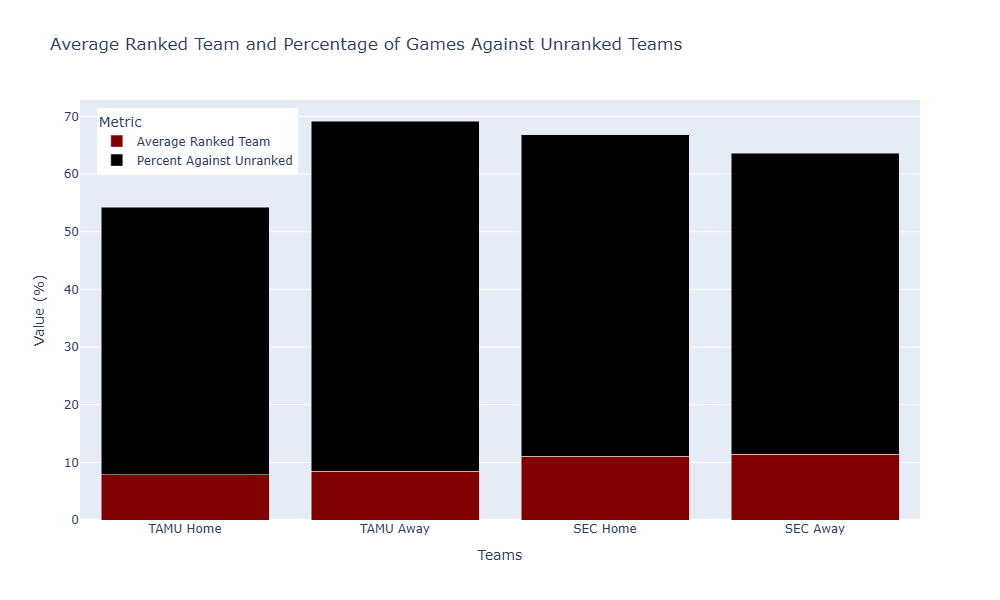

In [66]:
Image(filename='images/Opponent_Levels2.png')

## Interpretation of Graph 3:
This chart compares the strength of Texas A&M’s home and away opponents relative to the rest of the SEC. At home, A&M plays about 10% fewer games against unranked teams, and the ranked opponents they do face have an average ranking of 7.8—three spots tougher than the SEC home average of 11.1. On the road, however, A&M’s schedule is slightly easier in terms of unranked opponents, with an 8% higher chance of facing one. But when they do play ranked teams away, those opponents are stronger, averaging a rank of 8.5 compared to the SEC road average of 11.3.

## Graph 4. Scatter Plot with Regression Line: Texas A&M vs. SEC Home Attendance vs. Opponent Penalty Yards
* **Home Attendance:** Compares the home attendance at Texas A&M games vs. SEC games.
* **Opponent Penalty Yards:** Compares opponent penalty yards at Texas A&M home games vs. SEC home games.

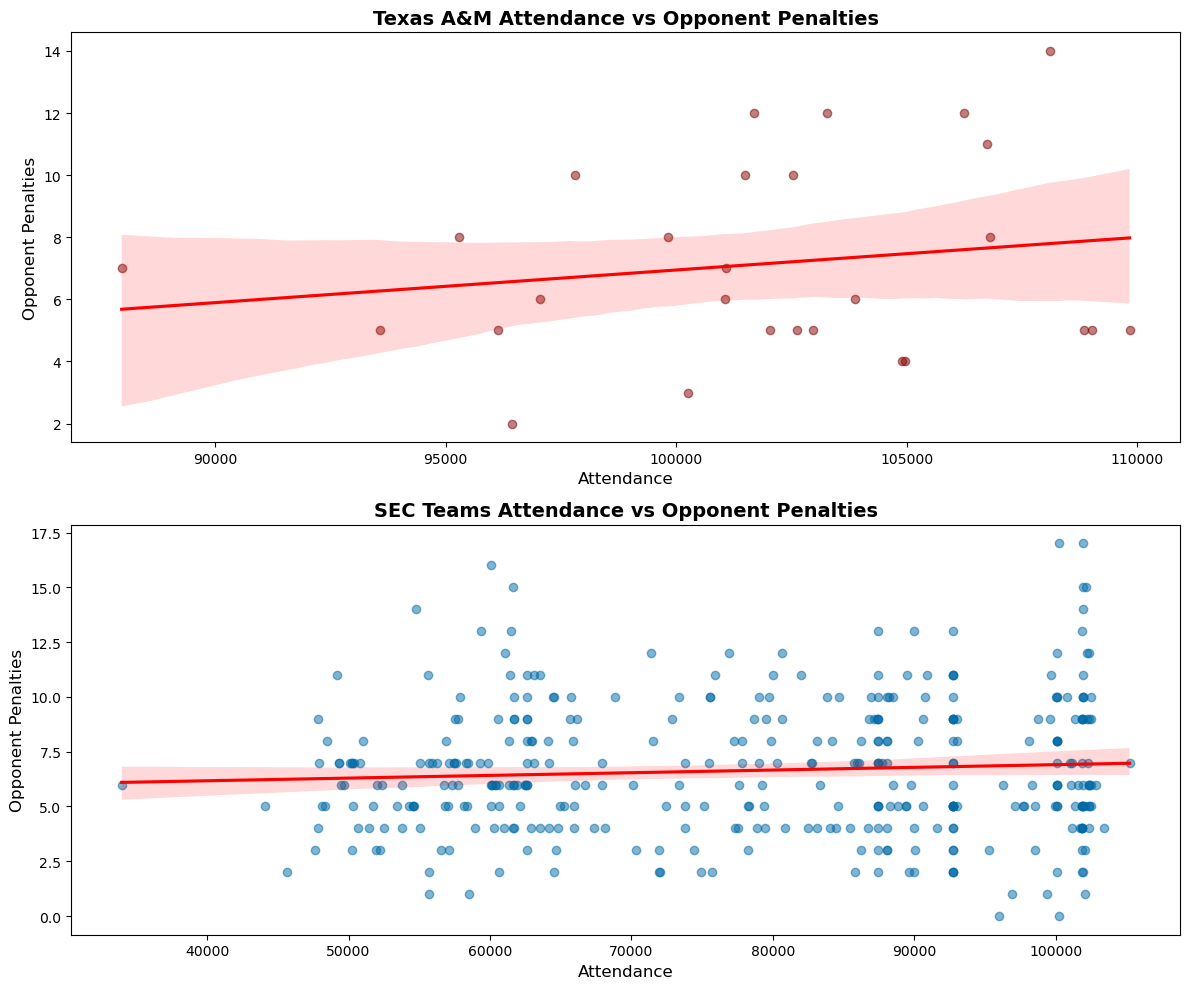

In [23]:
#Graph4: Scatter Plot with Regression line. Shows possible correlation of higher attendance levels and Opponent Penalties
tamu_data1 = TexasAM_Home[['Attendance', 'Penalties - Count - Away']]
sec_data1 = SEC_Teams[['Attendance', 'Penalties - Count - Away']]
combined_data = pd.concat([tamu_data1, sec_data1], ignore_index=True).dropna()

# Calculate correlations
correlation_tamu = tamu_data1.corr()
correlation_sec = sec_data1.corr()

# Set up figure
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Texas A&M plot
sns.regplot(
    x='Attendance', 
    y='Penalties - Count - Away', 
    data=tamu_data1, 
    ax=axes[0], 
    scatter_kws={'alpha': 0.5, 'color': '#800000'},  # Maroon dots
    line_kws={'color': 'red'}
)
axes[0].set_title('Texas A&M Attendance vs Opponent Penalties', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attendance', fontsize=12)
axes[0].set_ylabel('Opponent Penalties', fontsize=12)

# SEC teams plot
sns.regplot(
    x='Attendance', 
    y='Penalties - Count - Away',
    data=sec_data1, 
    ax=axes[1], 
    scatter_kws={'alpha': 0.5, 'color': '#006AA7'},
    line_kws={'color': 'red'}
)
axes[1].set_title('SEC Teams Attendance vs Opponent Penalties', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Attendance', fontsize=12)
axes[1].set_ylabel('Opponent Penalties', fontsize=12)

plt.tight_layout()
plt.show()


## Interpretation of Graph 4:
This scatter plot shows the relationship (or lack of) between higher attendance and the opposing team committing penalties at both Kyle Field and other SEC venues. While there are fewer data points, there’s a slight positive correlation when the Aggies pack the stadium compared to the average SEC home field experience. However, the correlation is minimal either way.

## Graph 5. Heatmap: Wins, Total Yards, Possession Time, Penalties, Interceptions, Fumbles, Third Downs, Fourth Downs, and Attendance for A&M vs. SEC Home vs. Away
**Data Points:** Various important game statistics, such as **wins, yards, possession time, penalties, turnovers**, and **attendance** for both Texas A&M and the SEC, for home and away games.

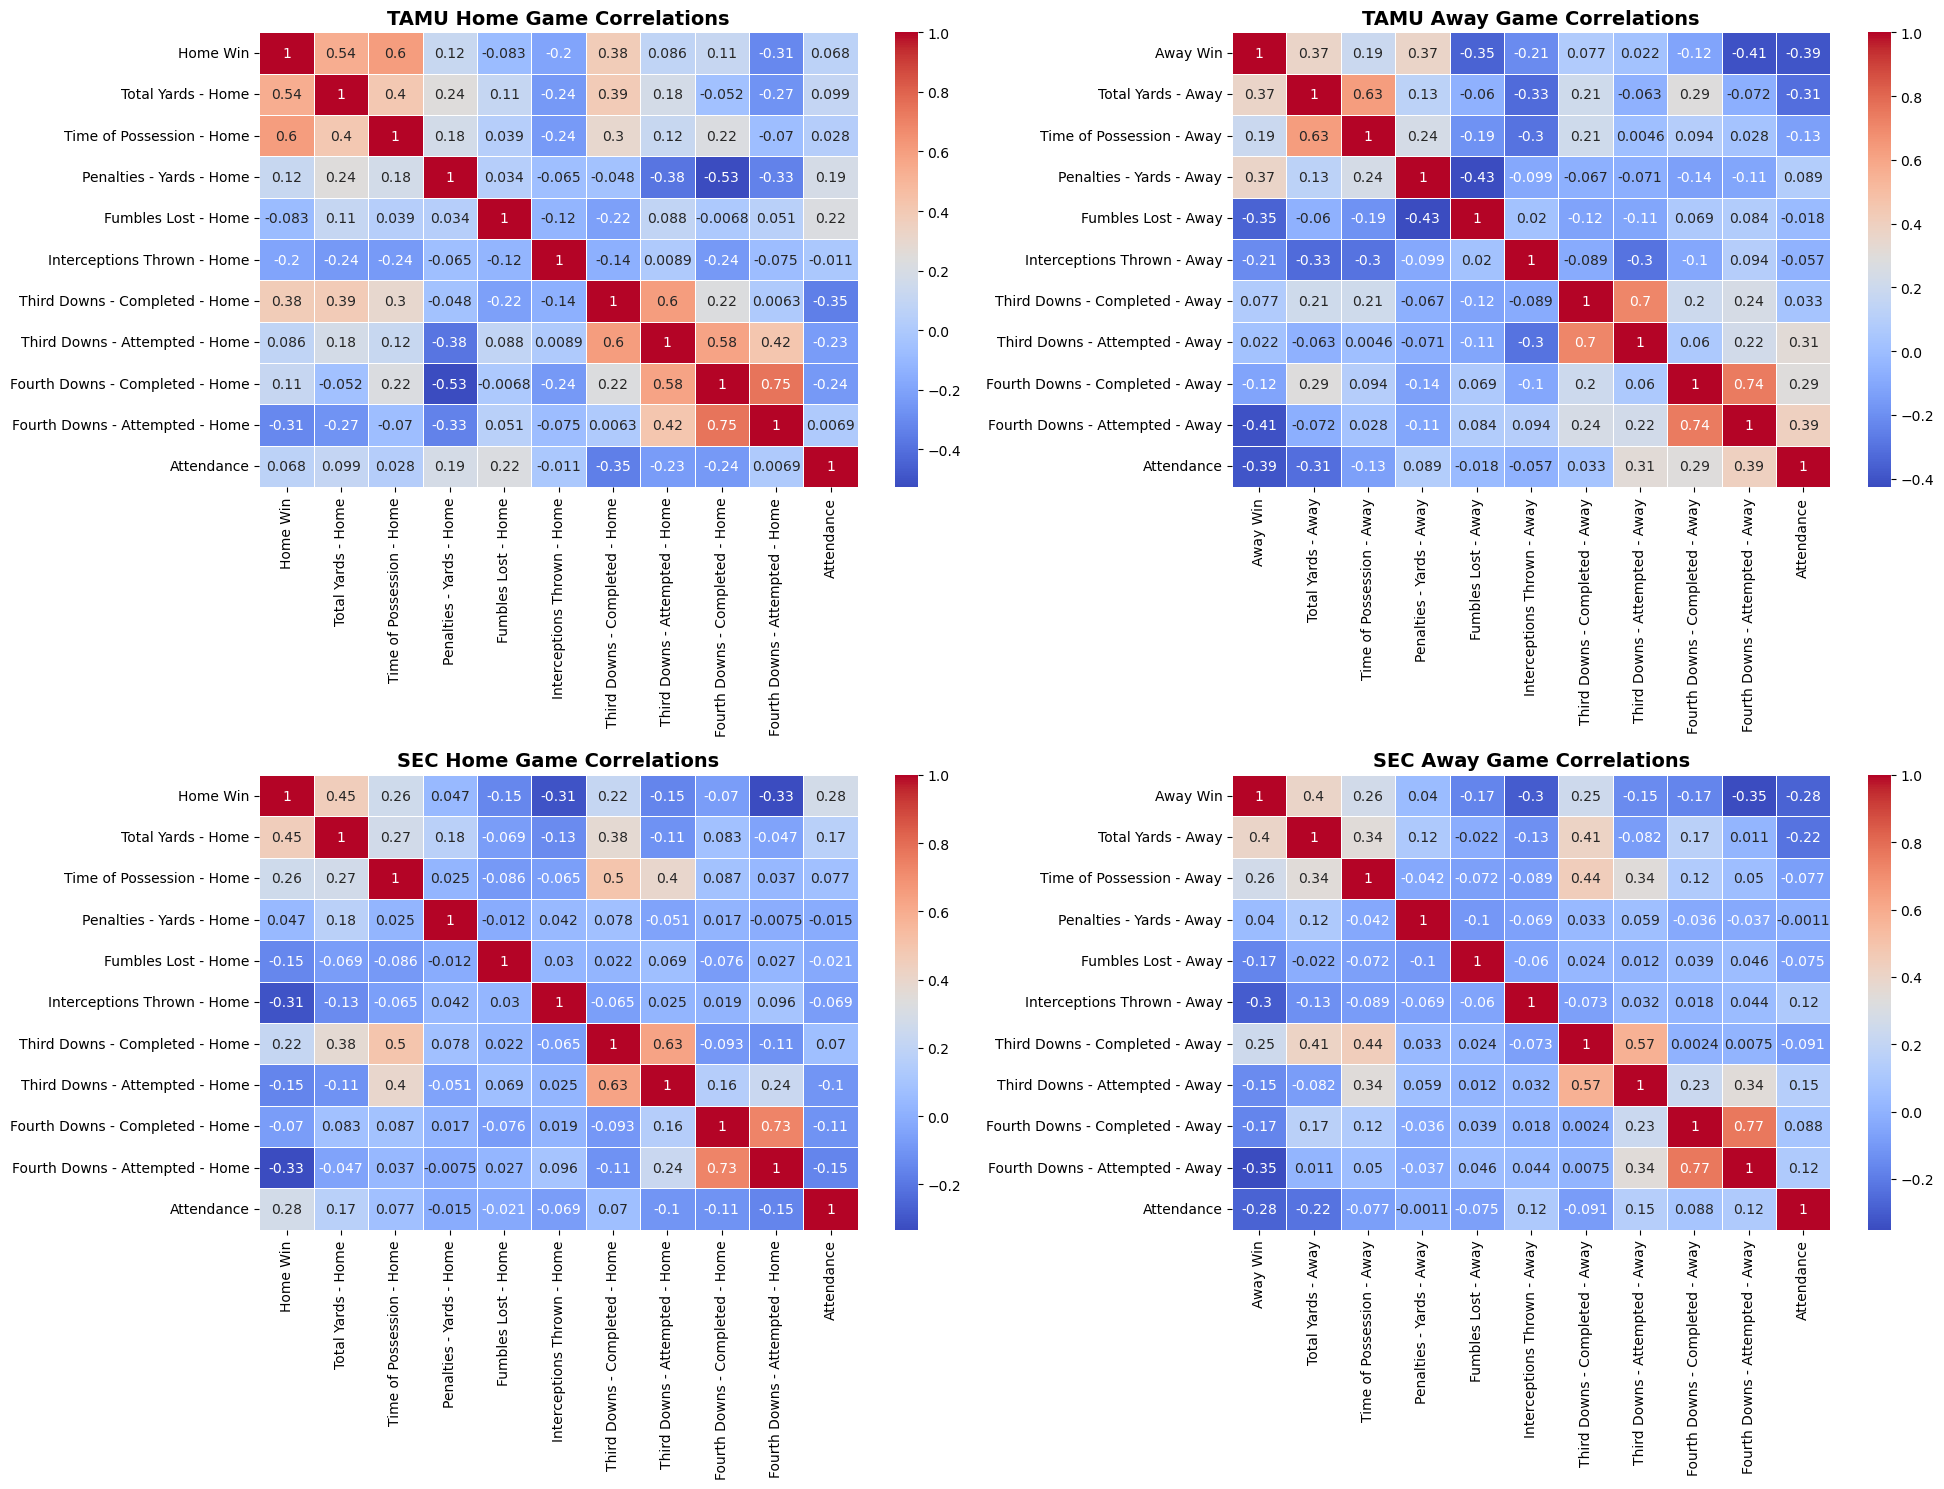

In [26]:
#Graph 5: Heat Map (personal favorite)
TexasAM_Home.apply(lambda row: 1 if row['Win'] == 'Texas A&M' else 0, axis=1)
home_corr = TexasAM_Home[['Home Win', 'Total Yards - Home', 'Time of Possession - Home', 'Penalties - Yards - Home',
                          'Fumbles Lost - Home', 'Interceptions Thrown - Home', 'Third Downs - Completed - Home', 
                          'Third Downs - Attempted - Home', 'Fourth Downs - Completed - Home', 
                          'Fourth Downs - Attempted - Home', 'Attendance']].corr()

away_corr = TexasAM_Away[['Away Win', 'Total Yards - Away', 'Time of Possession - Away', 'Penalties - Yards - Away',
                          'Fumbles Lost - Away', 'Interceptions Thrown - Away', 'Third Downs - Completed - Away', 
                          'Third Downs - Attempted - Away', 'Fourth Downs - Completed - Away', 
                          'Fourth Downs - Attempted - Away', 'Attendance']].corr()

sec_home_corr = SEC_Teams[['Home Win', 'Total Yards - Home', 'Time of Possession - Home', 'Penalties - Yards - Home',
                           'Fumbles Lost - Home', 'Interceptions Thrown - Home', 'Third Downs - Completed - Home', 
                           'Third Downs - Attempted - Home', 'Fourth Downs - Completed - Home', 
                           'Fourth Downs - Attempted - Home', 'Attendance']].corr()

sec_away_corr = SEC_Teams[['Away Win', 'Total Yards - Away', 'Time of Possession - Away', 'Penalties - Yards - Away',
                           'Fumbles Lost - Away', 'Interceptions Thrown - Away', 'Third Downs - Completed - Away', 
                           'Third Downs - Attempted - Away', 'Fourth Downs - Completed - Away', 
                           'Fourth Downs - Attempted - Away', 'Attendance']].corr()


# Plot heatmaps with updated labels
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

# List of correlation matrices and titles
corr_matrices = [home_corr, away_corr, sec_home_corr, sec_away_corr]
titles = ["TAMU Home Game Correlations", "TAMU Away Game Correlations", 
          "SEC Home Game Correlations", "SEC Away Game Correlations"]

# Apply label changes dynamically
for i, (a, corr_matrix, title) in enumerate(zip(ax.flat, corr_matrices, titles)):
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=a)

    a.set_title(title, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## Interpretation for Graph 5:
### Texas A&M Home-Field Advantage vs. SEC

- **Stronger Winning Factors:** Texas A&M’s home wins correlate more with total yards (0.54) and time of possession (0.6) than SEC teams (0.45, 0.26), emphasizing ball control in Kyle Field is important for wins.  
- **Turnover Resilience:** Unlike SEC teams, A&M’s interceptions (-0.2) and fumbles (-0.083) at home have minimal impact on winning, but fumbles (-0.35) and interceptions (-0.21) on the road hurt more significantly. 
- **Penalty Anomaly on the Road:** Surprisingly, A&M’s penalty yards correlate positively (0.37) with winning away games, an unusual trend not seen in the SEC overall.  
- **Attendance Impact:** A&M’s home attendance does **NOT** correlate (0.068) with winning (or losing), weaker than the average SEC environment (0.28).  
- However, away crowds affect A&M more negatively (-0.39 vs. SEC -0.28).  

### **Takeaway**
Kyle Field gives A&M an edge in overcoming mistakes compared to other SEC teams, but they struggle more on the road with turnovers and dealing with hostile crowds. Higher attendance at Kyle Field doesn’t seem to have much impact on wins, especially when compared to the rest of the SEC. There’s an interesting correlation between their road success and higher penalty yards—something that could be worth exploring further.

## Graph 6. Radar Chart: Texas A&M vs. SEC Home vs. Away Performance for Passing Yards, Rushing Yards, Win Percentage, Time of Possession, and Penalties
**Data Points:** Compares Texas A&M and SEC's performance at home vs. away in five key figures: **penalty yards, time of possession, win percentage, points allowed,** and **points scored.**

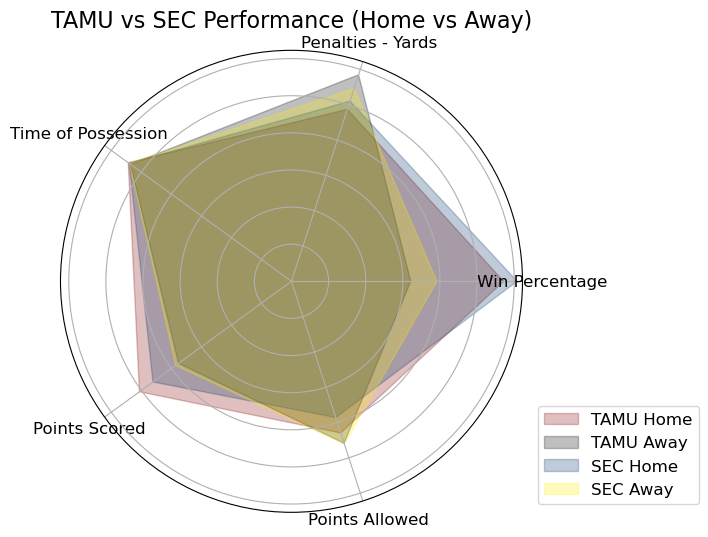

In [61]:
##Graph 6: Radar Chart Texas A&M vs. SEC Home vs. Away Performance for Passing Yards, Rushing Yards, Win Percentage, Time of Possession, and Penalties
labels = ['Win Percentage', 'Penalties - Yards', 'Time of Possession', 'Points Scored', 'Points Allowed']
mx = 1.6
home_values = [
    home_wins,  
    home_TAMUpenalties, 
    home_top*1.8, 
    TexasAM_Home['Score - Home'].mean()*mx,
    TexasAM_Home['Score - Away'].mean()*mx
]

away_values = [
    away_wins,  
    away_TAMUpenalties, 
    away_top*1.8, 
    TexasAM_Away['Score - Away'].mean()*mx,
    TexasAM_Away['Score - Home'].mean()*mx
]

sec_home_values = [
    sec_home_wins, 
    sec_home_penalties, 
    sec_home_top*1.8, 
    SEC_Teams['Score - Home'].mean()*mx,
    SEC_Teams['Score - Away'].mean()*mx
]
sec_away_values = [
    sec_away_wins,  
    sec_away_penalties, 
    sec_away_top*1.8, 
    SEC_Teams['Score - Away'].mean()*mx,
    SEC_Teams['Score - Home'].mean()*mx
]


# Compute the angle for each axis
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Make the plot circular by repeating the first value and angle
home_values += home_values[:1]
away_values += away_values[:1]
sec_home_values += sec_home_values[:1]
sec_away_values += sec_away_values[:1]
angles += angles[:1]

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each team's performance
ax.fill(angles, home_values, color='#800000', alpha=0.25, label='TAMU Home') 
ax.fill(angles, away_values, color='#000000', alpha=0.25, label='TAMU Away')
ax.fill(angles, sec_home_values, color='#003366', alpha=0.25, label='SEC Home')
ax.fill(angles, sec_away_values, color='#FFF000', alpha=0.25, label='SEC Away') 

# Add labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
plt.title("TAMU vs SEC Performance (Home vs Away)", fontsize=16)
ax.legend(loc='lower right', fontsize=12,bbox_to_anchor=(1.4, 0))
plt.show()


## Interpretation of Graph 6:
This radar chart shows A&M struggles with more penalty yards away, indicating discipline issues on the road. Time of possession is fairly consistent across both home and away games. A&M performs better at home, especially in points scored, where they outpace the SEC average. However, they also give up more points at home than the typical SEC team. The chart highlights a clear home-field advantage in the SEC, with Texas A&M and the SEC's win percentage jumping at home. **Unfortunately, Texas A&M's low road win percentage suggests that home field may be the main factor keeping them from falling to a below average team.**